In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def get_df(id):
    path = './' + 'ED_21_05/' + 'unity/' + 'Shovel_' + id + '.csv'
    return pd.read_csv(path)

c_0 = get_df("C0")
c_2 = get_df("C2")
p_0 = get_df("P0")
p_2 = get_df("p2")

c_0.head(3)

,ts_datetime,ts_unix_ms,primary_grab_hand,pt_x,pt_y,pt_z,st_x,st_y,st_z,pv_x,...,hmd_x,hmd_y,hmd_z,ee_x,ee_y,ee_z,shovel_loaded_state,cube_max_target_reached,grab_count,collision_or_load_count
0,5/20/2025 3:31:38 PM,1747747898994,Left,0.021720,0.047088,0.003749,0.059766,0.122947,0.338951,0.021739,...,0.036932,0.665690,0.084447,-2.479354e-08,0.070000,0.740000,False,0.0,1.0,0.0
1,5/20/2025 3:31:39 PM,1747747899006,Left,0.021669,0.046127,0.003441,0.059717,0.122047,0.337824,0.021695,...,0.037504,0.665942,0.085512,9.689845e-02,0.231271,0.717696,False,0.0,1.0,0.0
2,5/20/2025 3:31:39 PM,1747747899035,Left,0.022208,0.050446,0.004524,0.059387,0.120167,0.335608,0.022208,...,0.039200,0.667285,0.089270,9.875991e-02,0.222988,0.721789,False,0.0,1.0,0.0


In [11]:
def scatter(df, title, ax):

    ptx = df["pt_x"]
    ptz = df["pt_z"]

    stx = df["st_x"]
    stz = df["st_z"]

    eex = df["ee_x"]
    eez = df["ee_z"]

    # Create a scatter plot

    alpha = 0.1

    ax.scatter(ptx, ptz, alpha=alpha)
    ax.scatter(stx, stz, alpha=alpha)
    ax.scatter(eex, eez, alpha=alpha)

    ax.set_xlim([-0.25, 1.75])
    ax.set_ylim([-0.25, 1.75])

    ax.title.set_text(title)


    ax.set_xlabel('X [m]')
    ax.set_ylabel('Z [m]')

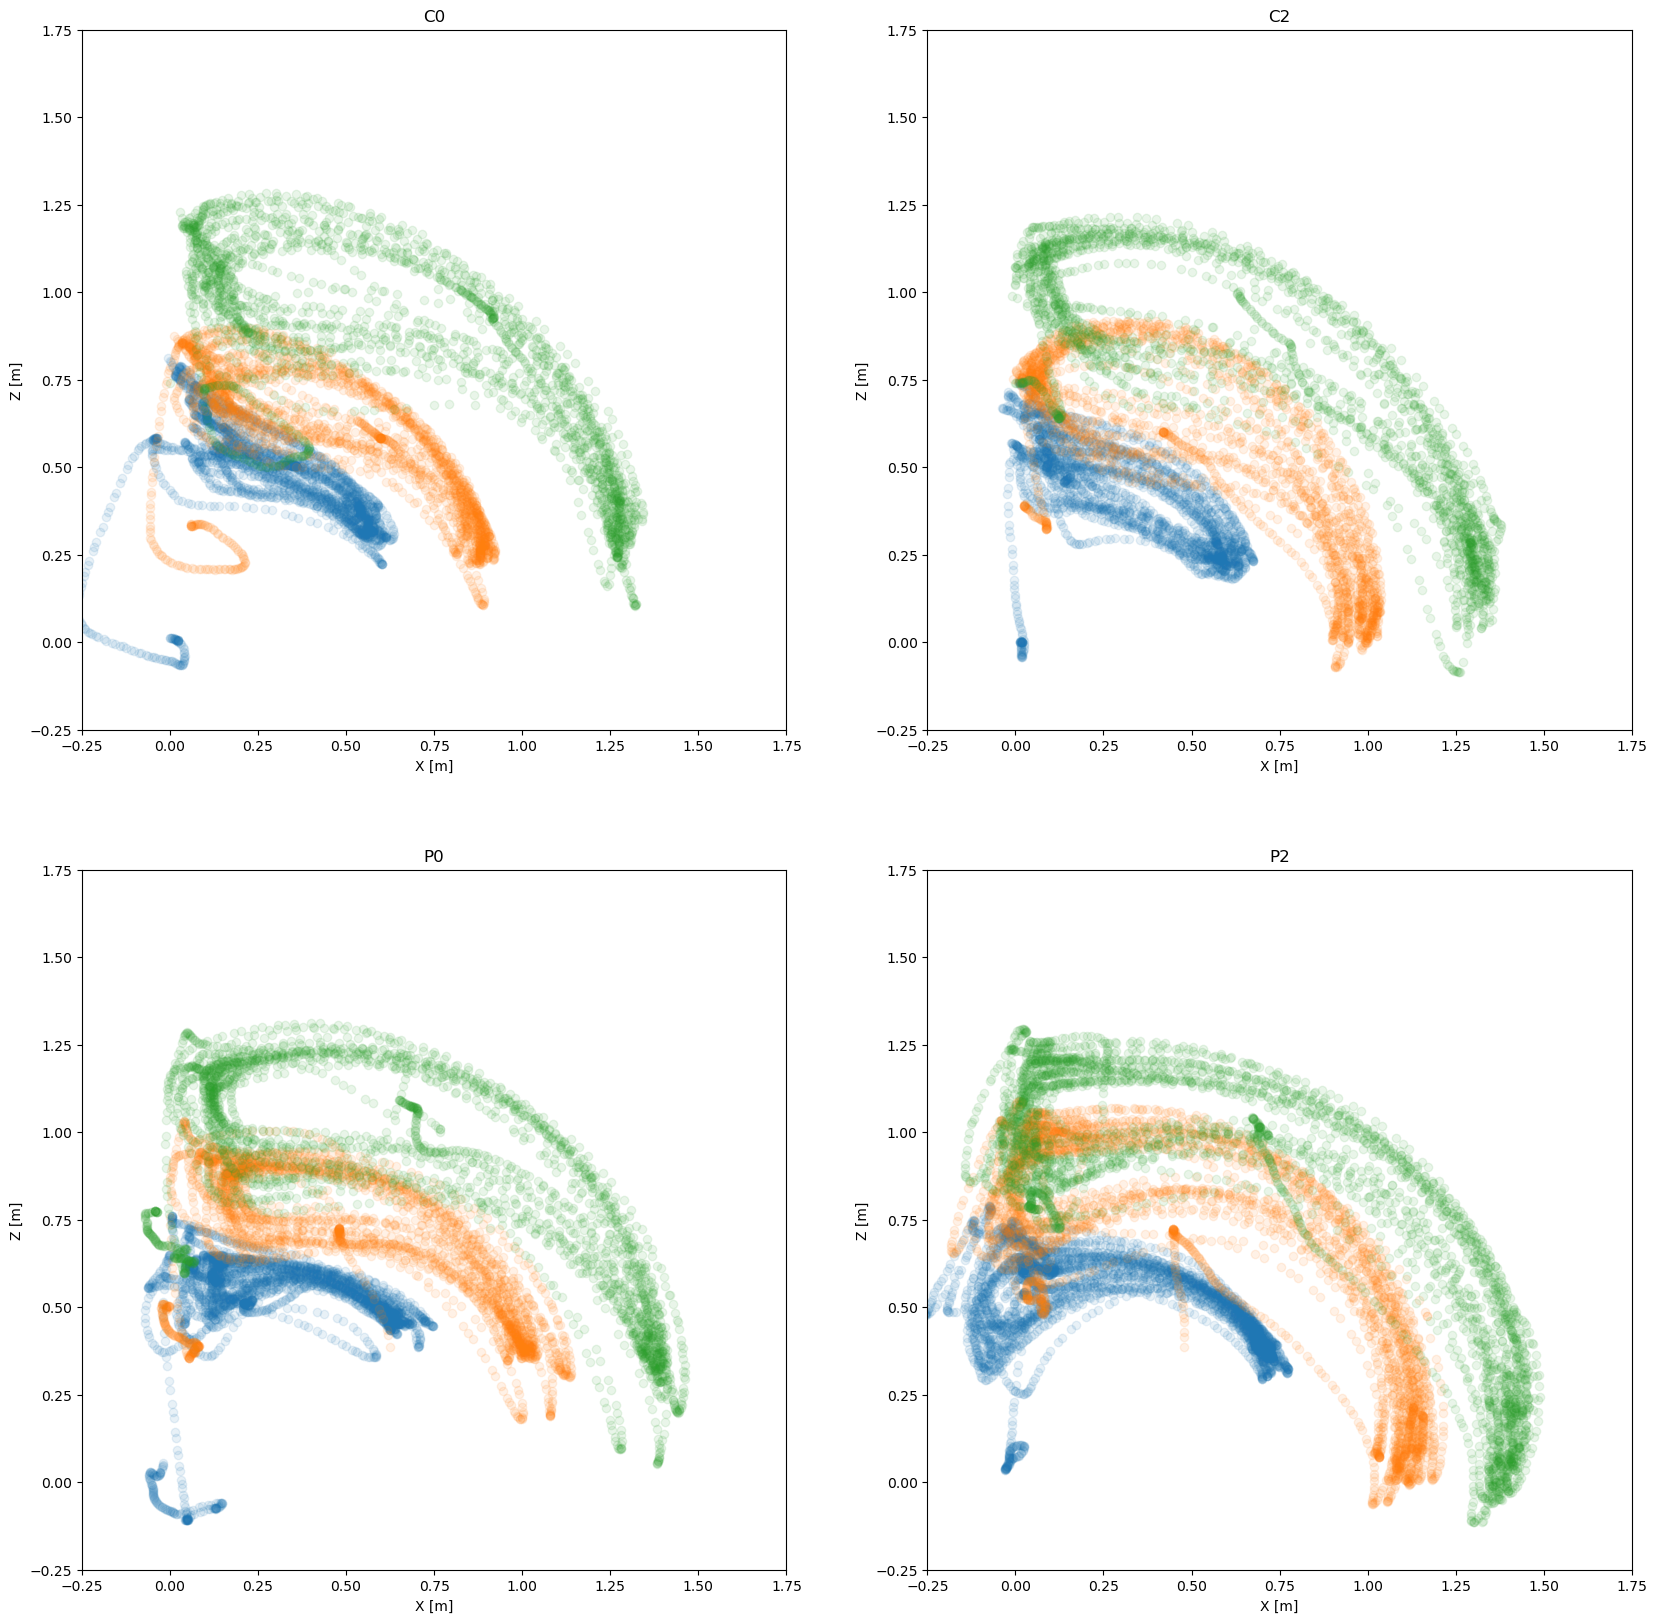

In [12]:
fig, axs = plt.subplots(2, 2)

fig.set_figwidth(20)
fig.set_figheight(20)

scatter(c_0, "C0", axs[0, 0])
scatter(c_2, "C2", axs[0, 1])
scatter(p_0, "P0", axs[1, 0])
scatter(p_2, "P2", axs[1, 1])

plt.show()

In [22]:
def heatmap(df, title, ax, tracking_pt):
    eex = df[tracking_pt+"_x"]
    eez = df[tracking_pt+"_z"]

    heatmap, xedges, yedges = np.histogram2d(eex, eez, bins=40, range=[[-0.25, 1.75], [-0.25, 1.75]])

    ax.title.set_text(title)
    # Plot the heatmap
    ax.imshow(heatmap.T, origin='lower', cmap='viridis', aspect='auto')
    

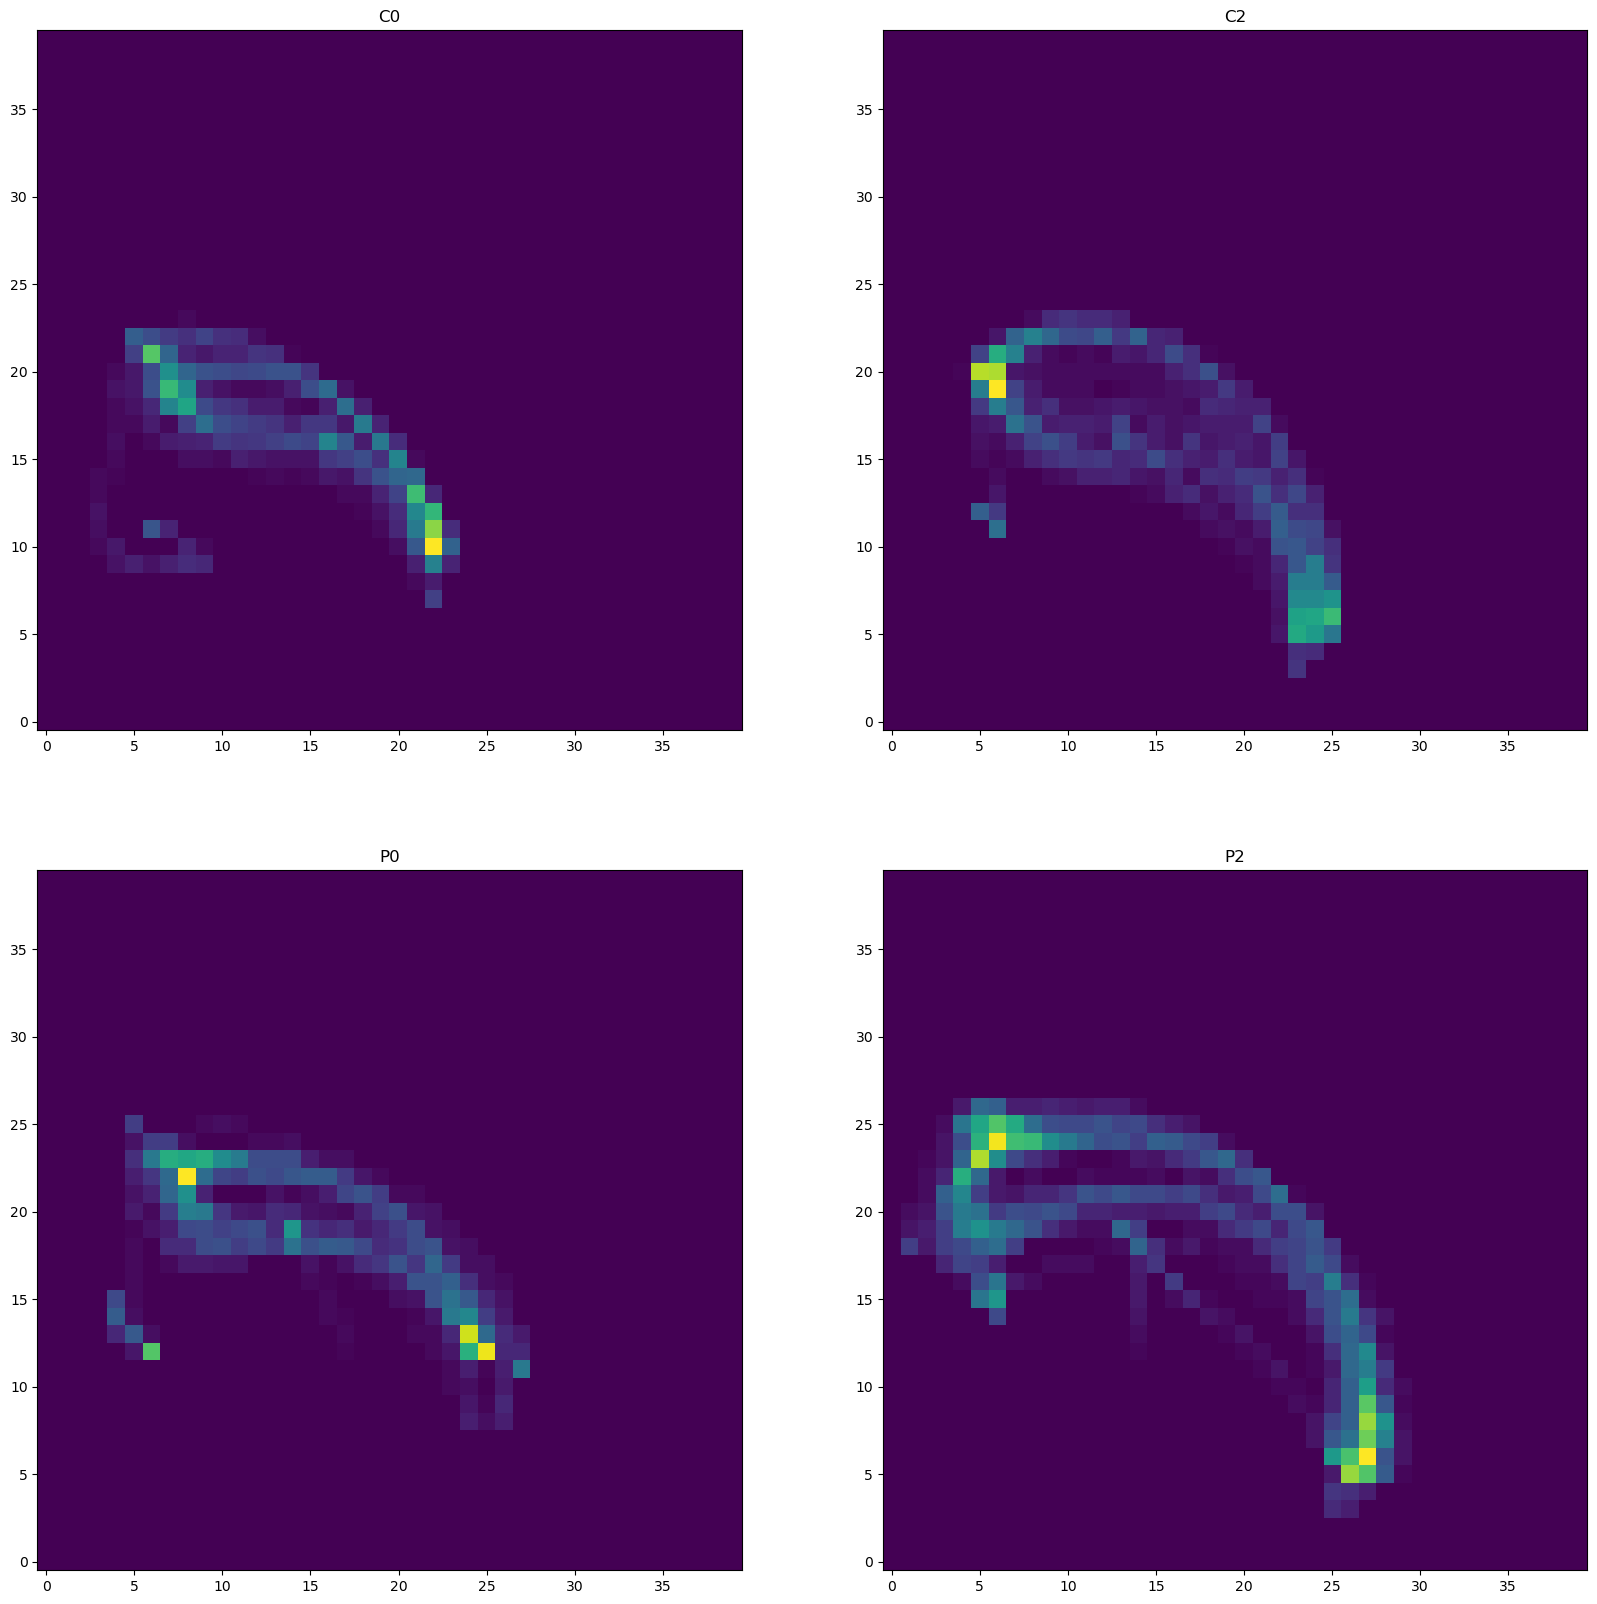

In [23]:
fig, axs = plt.subplots(2, 2)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "st"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_2, "C2", axs[0, 1], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_2, "P2", axs[1, 1], tracking_pt)

plt.show()

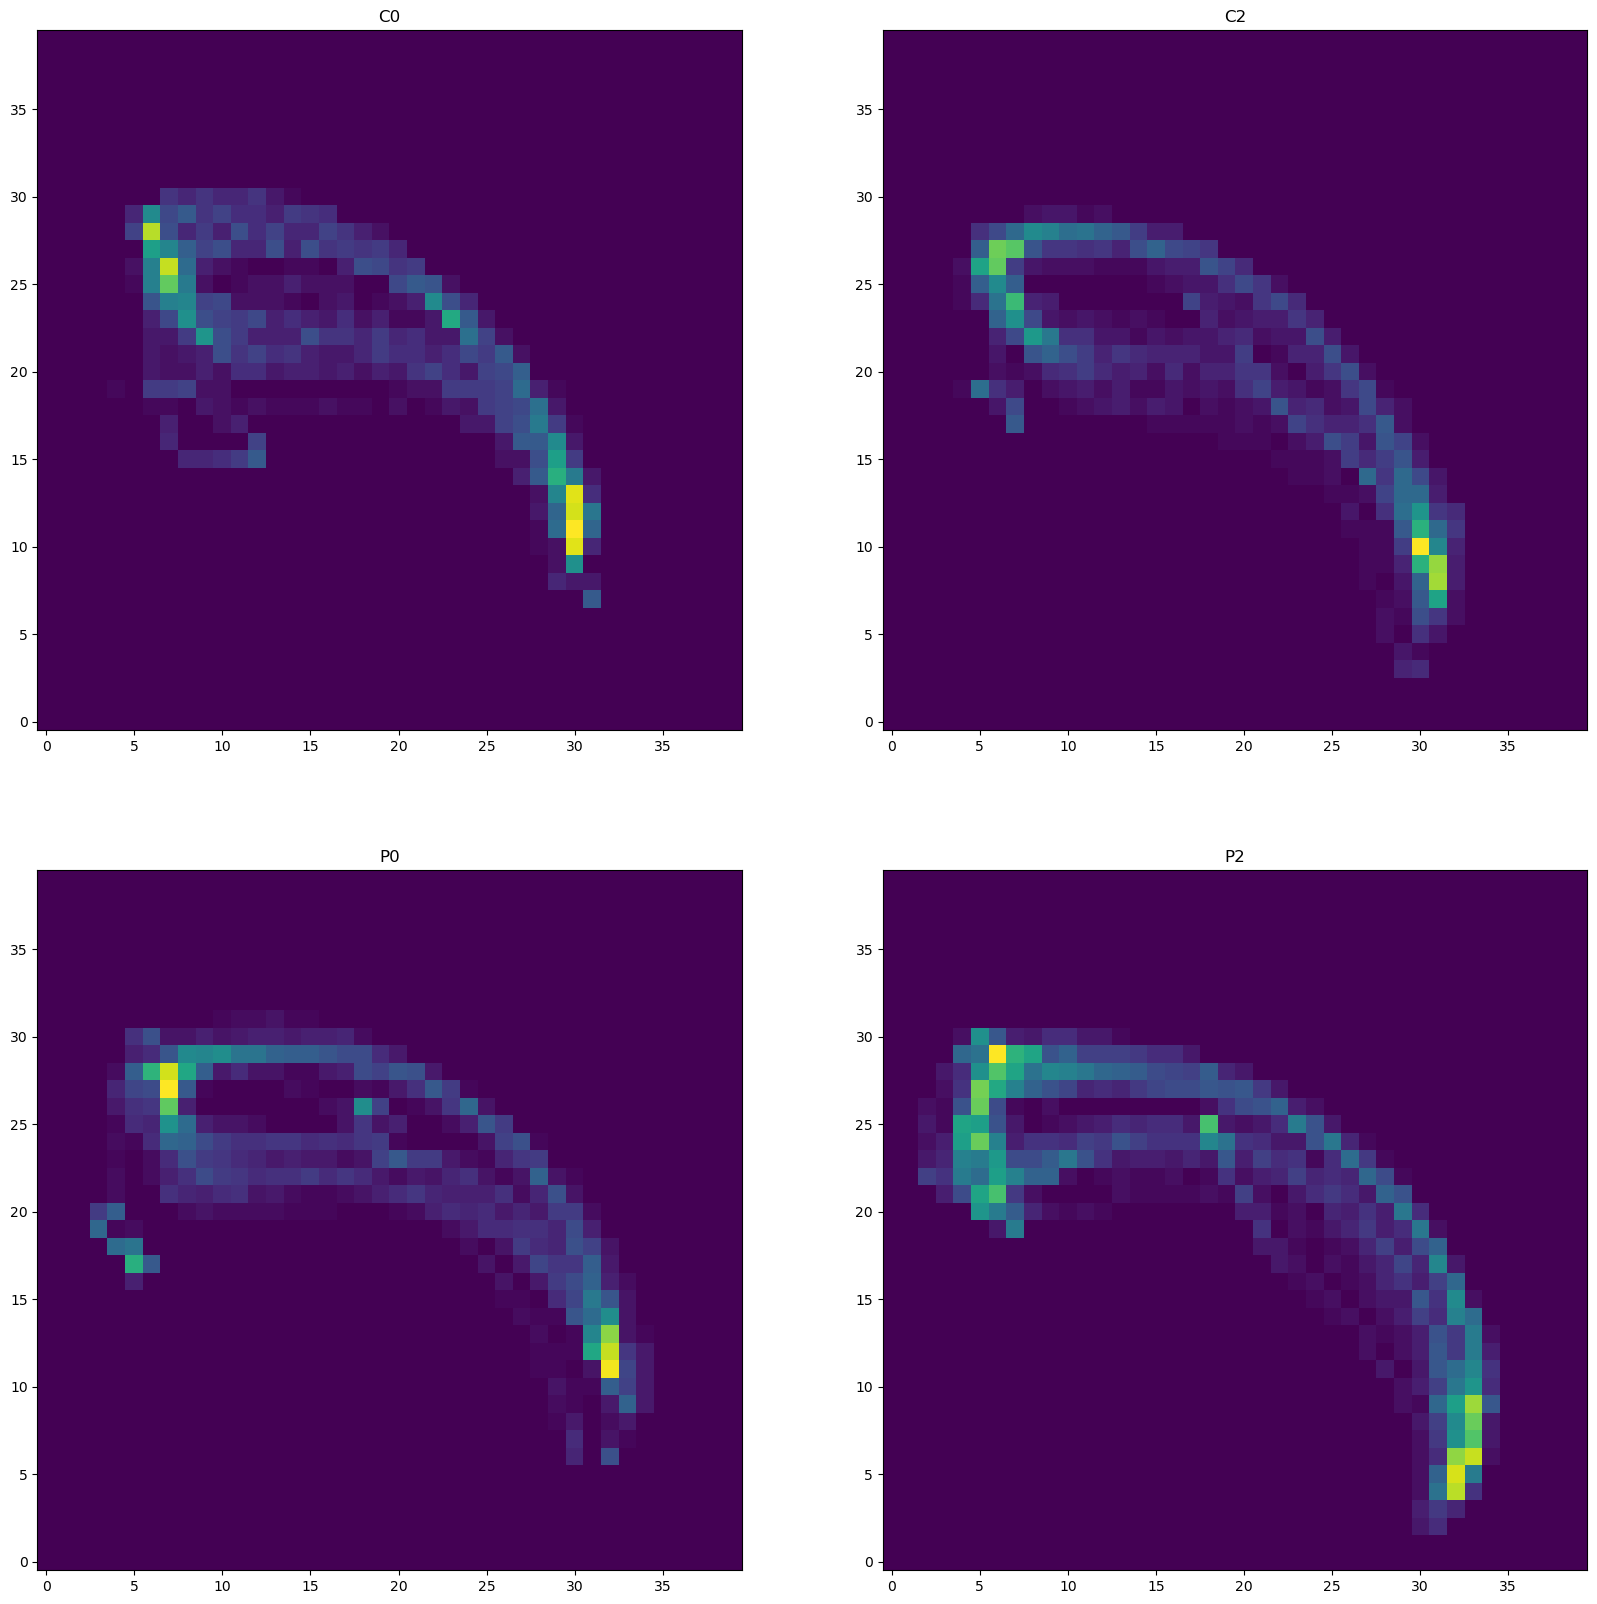

In [24]:
fig, axs = plt.subplots(2, 2)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "ee"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_2, "C2", axs[0, 1], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_2, "P2", axs[1, 1], tracking_pt)

plt.show()